****
## Analysis of Funded Project of Development by World Bank
Data:
http://jsonstudio.com/resources/

1. Find the 10 countries with most projects - visualize the results
2. Find the top 10 major project themes (using column 'mjtheme_namecode') - visualize the results
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in - visualize the results again


In [3]:
# Load library
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt

__Load Data and investigate general information__

In [4]:
df = pd.read_json('data/world_bank_projects.json')

In [6]:
df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Name': 'Regional integration', 'Percent': 46}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Name': 'Participation and civic engagement',...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,{'Name': 'Export development and competitivene...,"[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


__1. Find the 10 countries with most projects__

In [122]:
result_10_country = df['countryshortname'].value_counts()[:10]
result_10_country

Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Nepal                 12
Bangladesh            12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64

In [123]:
type(result_10_country)

pandas.core.series.Series

In [125]:
def visualization(result,title,xlabel,ylabel):
    ''' Visualize top 10 '''
    plt.style.use('ggplot')
    ax = result.plot(kind='barh', color = 'coral', fontsize = 13,sort_columns = False)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel )
    plt.gca().invert_yaxis()

    for i, v in enumerate(result.values):
        ax.text(v, i, str(v), color='coral',va='center',fontweight='bold') 


    plt.show()    

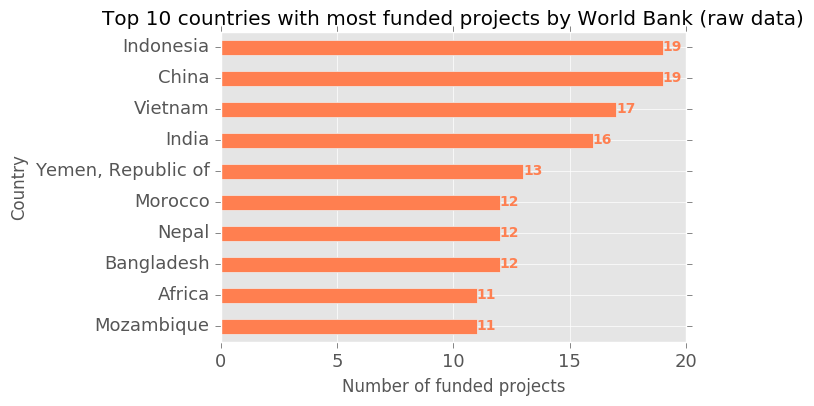

In [128]:
title = "Top 10 countries with most funded projects by World Bank (raw data)"
ylabel = 'Country'
xlabel = 'Number of funded projects'
visualization(result_10_country, title,xlabel,ylabel)

__2. Find the top 10 major project themes (using column 'mjtheme_namecode')__

In [71]:
df_proj_code = df['mjtheme_namecode']
df_proj_code.head()

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
Name: mjtheme_namecode, dtype: object

In [83]:
# Extract information
code = []
name = []

for i in range(df_proj_code.shape[0]):
    row = df_proj_code[i]
    for element in row:
        code.append(element['code'])
        name.append(element['name'])   
        
my_df = pd.DataFrame()
my_df['code'] = code
my_df['name'] = name
my_df.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [84]:
my_df.describe()

,code,name
count,1499,1499
unique,11,12
top,11,Environment and natural resources management
freq,250,223


Number of unique 'code' are 11 but number of 'name' are 12. It makes sense because 'name' contains NaN value

In [86]:
# Replace missing data with "NaN"
my_df = my_df.replace('', np.NaN)
my_df.head()

,code,name
0,8,Human development
1,11,NaN
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


Number of unique 'code' and number of 'name' are now equal

In [87]:
my_df.describe()

,code,name
count,1499,1377
unique,11,11
top,11,Environment and natural resources management
freq,250,223


In [109]:
# One way to find top 10
my_df.groupby('name')['name'].count().sort_values(ascending=False)

name
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: name, dtype: int64

In [91]:
# But I prefer this way
result_10_theme = my_df['name'].value_counts()[:10]
result_10_theme

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Name: name, dtype: int64

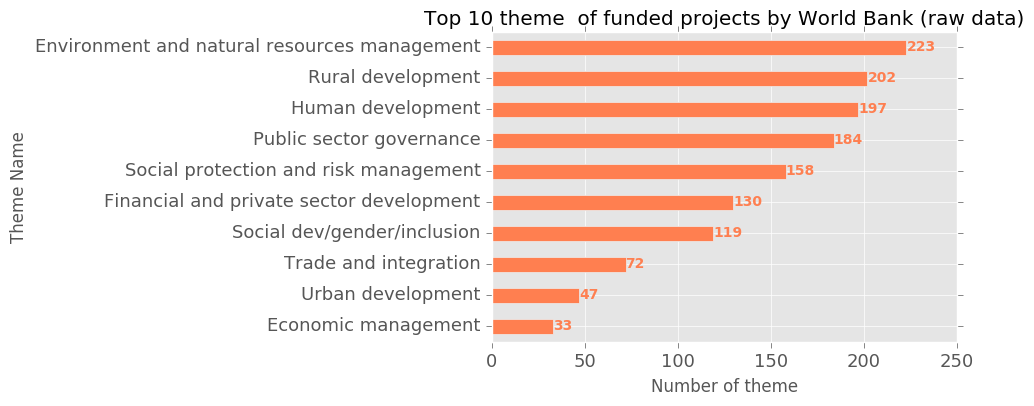

In [129]:
title = "Top 10 theme of funded projects by World Bank (raw data)"
ylabel = 'Theme Name'
xlabel = 'Number of theme'
visualization(result_10_theme, title,xlabel,ylabel)

__3. In 2 above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.__

In [118]:
# Count how many NaN value
my_df.isnull().sum()

code      0
name    122
dtype: int64

There are 122 missing values in 'Name' and 0 missing value in 'Code'. Therefore we can depend on 'Code' to fill out missing values of 'Name'

In [96]:
# We depend on 'Code' to fill out missing values
my_df_sort = my_df.sort_values(by= ['code','name'])
my_df_sort.tail(10)

,code,name
1347,9,Urban development
1425,9,Urban development
1426,9,Urban development
1428,9,Urban development
1470,9,Urban development
1473,9,Urban development
1495,9,Urban development
333,9,NaN
460,9,NaN
471,9,NaN


In [101]:
my_df_sort[my_df_sort['code'] == '1'].tail(10)

,code,name
1229,1,Economic management
1230,1,Economic management
1235,1,Economic management
1257,1,Economic management
1260,1,Economic management
212,1,NaN
363,1,NaN
1024,1,NaN
1114,1,NaN
1437,1,NaN


After sorting, all 'NaN' value are at bottom of each group code so it is convenient for me to use forward-fill to fill missing values

In [105]:
my_df_clean = my_df_sort.fillna(method='ffill')

In [106]:
my_df_clean[my_df_clean['code'] == '1'].tail(10)

,code,name
1229,1,Economic management
1230,1,Economic management
1235,1,Economic management
1257,1,Economic management
1260,1,Economic management
212,1,Economic management
363,1,Economic management
1024,1,Economic management
1114,1,Economic management
1437,1,Economic management


In [120]:
# Count NaN value again after filling out
my_df_clean.isnull().sum()

code    0
name    0
dtype: int64

It seems every missing value is filled but we need to check more carefully to make sure that there is no value filling by mistake.

In [111]:
# Testing whether we fill out missing value correctly
code_arr = my_df_clean['code'].unique().sort.values()
for c in code_arr:
    shape_sort = my_df_sort[my_df_sort['code'] == c].shape[0]
    shape_clean = my_df_clean[my_df_clean['code'] == c].shape[0]
    compare = shape_sort == shape_clean
#     print(shape_sort == shape_clean)
    print("Code number %s : Check Status: %s" % (c,compare))

Code number 1 : Check Status: True
Code number 10 : Check Status: True
Code number 11 : Check Status: True
Code number 2 : Check Status: True
Code number 3 : Check Status: True
Code number 4 : Check Status: True
Code number 5 : Check Status: True
Code number 6 : Check Status: True
Code number 7 : Check Status: True
Code number 8 : Check Status: True
Code number 9 : Check Status: True


Because there are 122 missing values so it may change the results of Ranking, Let's see the Ranking again

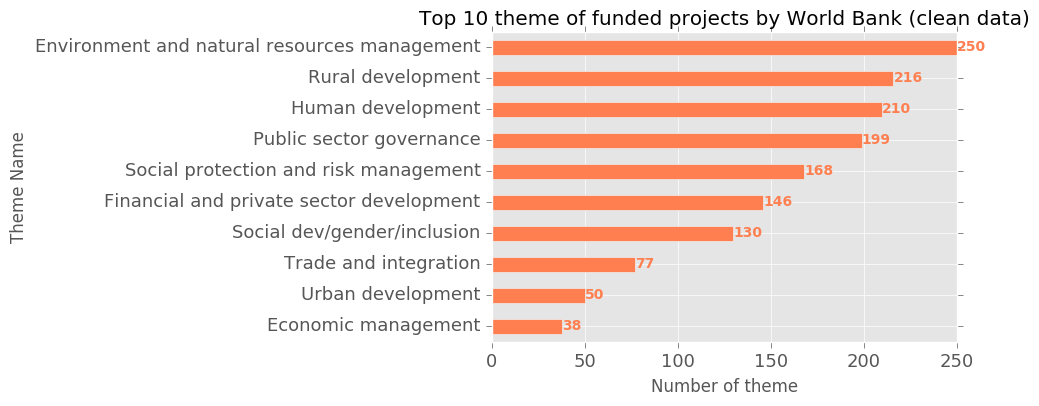

In [130]:
# Check the result after filling missing value
result_10_theme_clean = my_df_clean['name'].value_counts()[:10]
title = "Top 10 theme of funded projects by World Bank (clean data)"
ylabel = 'Theme Name'
xlabel = 'Number of theme'
visualization(result_10_theme_clean, title,xlabel,ylabel)